# TP5 - exercice 1

## Simulation de la loi normale (méthode de Box Muller)

**Générer des variables aléatoires normales à partir de variables uniformes**

Nous  avons  vu  dans  le  TP  précédent  la simulation de lois continues à l’aide de la méthode d’inversion qui consiste à 
calculer la variable aléatoire 𝑋 associée à la loi par la formule 𝑋 =𝐹−1(𝑌) où 𝐹 est la fonction de répartition de 𝑋 et 𝑌 est 
une variable aléatoire uniformément distribuée sur [0,1]. 

La fonction 𝑒**−𝑥2 n’admet pas de primitive pouvant s’exprimer simplement à l’aide des fonctions usuelles. On ne peut donc 
donner une expression littérale de la fonction de répartition d’une loi  normale,  et  par  conséquent  on  ne  peut  appliquer  la 
méthode d’inversion pour simuler une loi normale. 

L’objectif de cet exercice est d’introduire la méthode dite de Box-Muller qui permet la simulation simultanée de 2 variables 
aléatoires normales centrées réduites. 
Soit (𝑋,𝑌) un couple de variables aléatoires représentant les coordonnées d’un point dans le plan. On suppose que 𝑋 et 𝑌 
sont indépendantes et qu’elles sont de distribution normale centrée réduite. On note 𝑓𝑋,𝑌 leur densité conjointe. 

On note 𝑅 et Θ les variables aléatoires correspondantes aux coordonnées polaires du point : 
{𝑋 =𝑅cosΘ 
𝑌 =𝑅sinΘ

### Question 1

En vous aidant des résultats obtenus à l’exercice 10 du chapitre III du cours de probabilités continues, vérifier à l’aide 
d’un programme Python, que les variables 𝑋 et 𝑌 suivent une loi normale centrée réduite

Text(0.5, 1.0, 'Verification de la loi normale  le centrée sur Y')

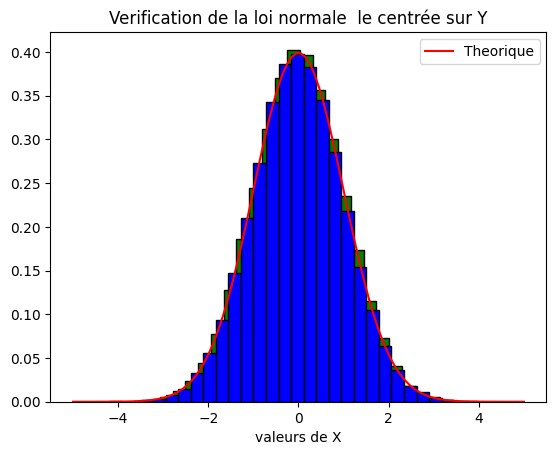

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 50000

# fonction conjointe f(R,O) theorique
axe = np.linspace(-5,5,100)
theo = ((1/(np.sqrt(2*np.pi)))*np.exp((-axe**2)/2))  #enonce
plt.plot(axe,theo, label = 'Theorique', color = 'red')
plt.legend()

# Simulation empirique de la loi uniforme sur [0,1]
U1 = np.random.rand(n)  
U2 = np.random.rand(n)  

# Simulation empirique de X et Y
X = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)       # TD
Y = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

# Affichage de X et Y
hX_prob, binsX_prob, _ = plt.hist(X, bins=30, density=True, color = "green",edgecolor='black', label = 'Empirique X')
plt.xlabel('valeurs de X')
plt.title('Verification de la loi normale  le centrée sur X')

hX_prob, binsX_prob, _ = plt.hist(Y, bins=30, density=True, color = "blue",edgecolor='black', label = 'Empirique Y')
plt.xlabel('valeurs de X')
plt.title('Verification de la loi normale  le centrée sur Y')

### Question 2

Loi normale avec des parametres quelconques

La moyenne théorique Eth(X) =  4
La moyenne empirique Eemp(X) =  4.018854952147203
L'ecart type théorique est oth(X) = 3
L'ecart type empirique est oemp(X) = =  2.9955861202393503


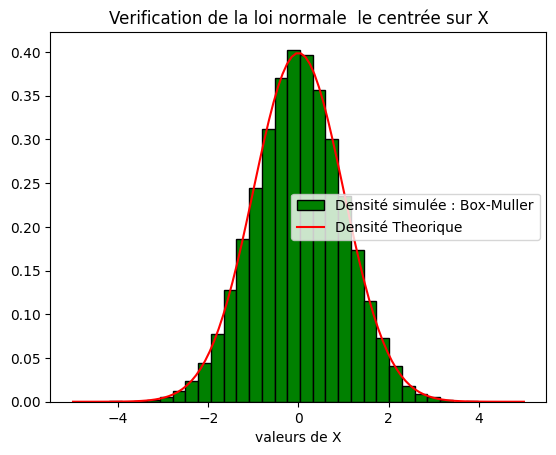

In [4]:
moyenne = 4
ecart = 3

# fonction theorique : uniforme à param quelconque
theoZ = (theo * ecart) + moyenne    # T_unif = (X-moyenne) / ecart_type

# Simulation de la loi normale avec des parametres quelconques 
Z = (X * ecart) + moyenne

# Affichage de X et Y
hX_prob, binsX_prob, _ = plt.hist(X, bins=30, density=True, color = "green",edgecolor='black', label = 'Densité simulée : Box-Muller')
plt.xlabel('valeurs de X')
plt.title('Verification de la loi normale  le centrée sur X')

plt.plot(axe,theo, label = 'Densité Theorique', color = 'red')
plt.legend()

# conclusion
print("La moyenne théorique Eth(X) = ", moyenne)    
print("La moyenne empirique Eemp(X) = ", np.mean(Z))
print("L'ecart type théorique est oth(X) =", ecart)
print("L'ecart type empirique est oemp(X) = = ", np.std(Z))